# show reconstruct image

In [13]:
import pickle
import yaml

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [3]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [4]:
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
PKL_DIR = OUTPUT_ROOT + '/pkl'

In [6]:
with open('{}/{}_history.pkl'.format(PKL_DIR, 'pump'), 'rb') as file:
    history = pickle.load(file)

In [7]:
history['reconstruct_img']['input'][0].shape

torch.Size([3, 64, 512, 1])

In [8]:
epoch_num = 6 # * 10

In [10]:
input_img = history['reconstruct_img']['input'][epoch_num][0,:,:,0].to('cpu')
output_img = history['reconstruct_img']['output'][epoch_num][0,:,:,0].to('cpu')

In [11]:
input_img.shape

torch.Size([64, 512])

In [14]:
np.array(F.mse_loss(output_img, input_img))

array(21.275333, dtype=float32)

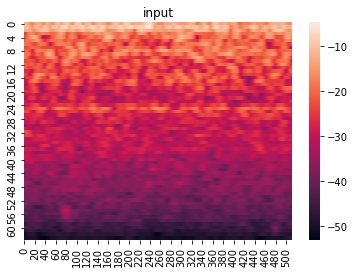

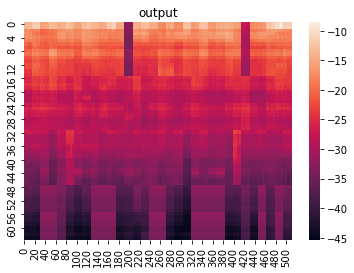

In [15]:
sns.heatmap(input_img)
plt.title('input')
plt.show()
sns.heatmap(output_img)
plt.title('output')
plt.show()

# eval

## import library

In [1]:
########################################################################
# import default python-library
########################################################################
import os
import glob
import csv
import re
import itertools
import sys
from collections import defaultdict
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy
from sklearn import metrics
import common as com
import pytorch_modeler as modeler
from pytorch_model import CNN6PANNsAutoEncoder as Model
import torch.utils.data
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import matplotlib.pyplot as plt
import seaborn as sns
########################################################################
import eval_functions as eval_func

## Setting

In [2]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

In [3]:
########################################################################
# Setting seed
########################################################################
modeler.set_seed(42)

In [4]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
os.makedirs(MODEL_DIR, exist_ok=True)

In [5]:
########################################################################
# for original function
########################################################################
param = {}
param["dev_directory"] = dev_path
param["eval_directory"] = eval_path
param["model_directory"] = MODEL_DIR
param["result_directory"] = RESULT_DIR
param["result_file"] = 'result.csv'

## run eval

In [6]:
def make_reconstruct_img(x, y, label, file_name):
    fig = plt.figure(figsize=(10,5)) # width, height
    fig.suptitle('label={}'.format(label))
    ax1 = fig.add_subplot(121, title='x') # 明示的にAxesを作成する
    sns.heatmap(x, ax=ax1) # ax1を参照するようにする
    ax2 = fig.add_subplot(122, title='y')
    sns.heatmap(y, ax=ax2)
    fig.savefig('{}.png'.format(file_name))

In [7]:
mode = 'dev'

2020-10-16 23:21:20,561 - INFO - load_directory <- development
2020-10-16 23:21:20,563 - INFO - ===========================
2020-10-16 23:21:20,563 - INFO - [1/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar
2020-10-16 23:21:20,564 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:21:22,129 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_01
2020-10-16 23:21:22,143 - INFO - test_file  num : 601
2020-10-16 23:21:22,144 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-16 23:21:35,340 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyCar_id_01.csv
2020-10-16 23:21:35,345 - INFO - AUC : 0.5011041548093341
2020-10-16 23:21:35,345 - INFO - pAUC : 0.5009794888374942
2020-10-16 23:21:35,346 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:21:35,346 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_02
2020-10-16 23:21:35,356 - INFO - test_file  num : 602
2020-10-16 23:21:35,357 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-16 23:21:48,128 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyCar_id_02.csv
2020-10-16 23:21:48,131 - INFO - AUC : 0.5010997732426304
2020-10-16 23:21:48,132 - INFO - pAUC : 0.5010242148886173
2020-10-16 23:21:48,132 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:21:48,133 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_03
2020-10-16 23:21:48,141 - INFO - test_file  num : 602
2020-10-16 23:21:48,142 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-16 23:22:01,159 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyCar_id_03.csv
2020-10-16 23:22:01,163 - INFO - AUC : 0.5011224489795919
2020-10-16 23:22:01,163 - INFO - pAUC : 0.5011435608726249
2020-10-16 23:22:01,164 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:22:01,164 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_04
2020-10-16 23:22:01,174 - INFO - test_file  num : 602
2020-10-16 23:22:01,175 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-16 23:22:14,108 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyCar_id_04.csv
2020-10-16 23:22:14,110 - INFO - AUC : 0.5011337868480726
2020-10-16 23:22:14,111 - INFO - pAUC : 0.5012032338646287
2020-10-16 23:22:14,111 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:22:14,112 - INFO - ===========================
2020-10-16 23:22:14,112 - INFO - [2/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor
2020-10-16 23:22:14,113 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:22:14,478 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_01
2020-10-16 23:22:14,494 - INFO - test_file  num : 1181
2020-10-16 23:22:14,495 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-16 23:22:36,888 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyConveyor_id_01.csv
2020-10-16 23:22:36,892 - INFO - AUC : 0.5013681102362204
2020-10-16 23:22:36,892 - INFO - pAUC : 0.501325448931072
2020-10-16 23:22:36,893 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:22:36,893 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_02
2020-10-16 23:22:36,904 - INFO - test_file  num : 1136
2020-10-16 23:22:36,905 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:22:58,425 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyConveyor_id_02.csv
2020-10-16 23:22:58,428 - INFO - AUC : 0.5017299107142857
2020-10-16 23:22:58,429 - INFO - pAUC : 0.5017273270111369
2020-10-16 23:22:58,430 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:22:58,430 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_03
2020-10-16 23:22:58,441 - INFO - test_file  num : 1135
2020-10-16 23:22:58,442 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:23:20,172 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_ToyConveyor_id_03.csv
2020-10-16 23:23:20,175 - INFO - AUC : 0.5017246260206211
2020-10-16 23:23:20,176 - INFO - pAUC : 0.501706175950269
2020-10-16 23:23:20,177 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:23:20,177 - INFO - ===========================
2020-10-16 23:23:20,178 - INFO - [3/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan
2020-10-16 23:23:20,179 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:23:20,766 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_00
2020-10-16 23:23:20,772 - INFO - test_file  num : 489
2020-10-16 23:23:20,773 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures hav

2020-10-16 23:23:31,249 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_fan_id_00.csv
2020-10-16 23:23:31,252 - INFO - AUC : 0.4926221079691517
2020-10-16 23:23:31,252 - INFO - pAUC : 0.4934876670191822
2020-10-16 23:23:31,253 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:23:31,253 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_02
2020-10-16 23:23:31,261 - INFO - test_file  num : 441
2020-10-16 23:23:31,261 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:23:41,235 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_fan_id_02.csv
2020-10-16 23:23:41,238 - INFO - AUC : 0.49296187683284454
2020-10-16 23:23:41,239 - INFO - pAUC : 0.49370178693486966
2020-10-16 23:23:41,240 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:23:41,240 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_04
2020-10-16 23:23:41,247 - INFO - test_file  num : 430
2020-10-16 23:23:41,248 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:23:51,103 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_fan_id_04.csv
2020-10-16 23:23:51,106 - INFO - AUC : 0.49303030303030304
2020-10-16 23:23:51,107 - INFO - pAUC : 0.4936366891254109
2020-10-16 23:23:51,107 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:23:51,107 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_06
2020-10-16 23:23:51,113 - INFO - test_file  num : 443
2020-10-16 23:23:51,114 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:01,120 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_fan_id_06.csv
2020-10-16 23:24:01,123 - INFO - AUC : 0.49288629737609324
2020-10-16 23:24:01,124 - INFO - pAUC : 0.4933783855724275
2020-10-16 23:24:01,124 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:01,125 - INFO - ===========================
2020-10-16 23:24:01,125 - INFO - [4/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump
2020-10-16 23:24:01,126 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:24:01,691 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_00
2020-10-16 23:24:01,694 - INFO - test_file  num : 237
2020-10-16 23:24:01,695 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have be

2020-10-16 23:24:07,916 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_pump_id_00.csv
2020-10-16 23:24:07,918 - INFO - AUC : 0.4973722627737226
2020-10-16 23:24:07,919 - INFO - pAUC : 0.4979184143884215
2020-10-16 23:24:07,920 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:07,920 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_02
2020-10-16 23:24:07,923 - INFO - test_file  num : 205
2020-10-16 23:24:07,924 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:13,557 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_pump_id_02.csv
2020-10-16 23:24:13,560 - INFO - AUC : 0.4993333333333333
2020-10-16 23:24:13,560 - INFO - pAUC : 0.4985627333640223
2020-10-16 23:24:13,561 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:13,561 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_04
2020-10-16 23:24:13,564 - INFO - test_file  num : 194
2020-10-16 23:24:13,564 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:19,379 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_pump_id_04.csv
2020-10-16 23:24:19,382 - INFO - AUC : 0.5007446808510638
2020-10-16 23:24:19,382 - INFO - pAUC : 0.5011426743149667
2020-10-16 23:24:19,383 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:19,383 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_06
2020-10-16 23:24:19,388 - INFO - test_file  num : 196
2020-10-16 23:24:19,391 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:24,901 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_pump_id_06.csv
2020-10-16 23:24:24,904 - INFO - AUC : 0.5005208333333333
2020-10-16 23:24:24,905 - INFO - pAUC : 0.5009286609380594
2020-10-16 23:24:24,905 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:24,906 - INFO - ===========================
2020-10-16 23:24:24,906 - INFO - [5/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider
2020-10-16 23:24:24,907 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:24:25,472 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_00
2020-10-16 23:24:25,476 - INFO - test_file  num : 445
2020-10-16 23:24:25,477 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures hav

2020-10-16 23:24:35,323 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_slider_id_00.csv
2020-10-16 23:24:35,325 - INFO - AUC : 0.4928985507246376
2020-10-16 23:24:35,326 - INFO - pAUC : 0.4935163996948894
2020-10-16 23:24:35,327 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:35,327 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_02
2020-10-16 23:24:35,331 - INFO - test_file  num : 356
2020-10-16 23:24:35,332 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:43,783 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_slider_id_02.csv
2020-10-16 23:24:43,787 - INFO - AUC : 0.49390625
2020-10-16 23:24:43,787 - INFO - pAUC : 0.49443642588614395
2020-10-16 23:24:43,788 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:43,788 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_04
2020-10-16 23:24:43,793 - INFO - test_file  num : 267
2020-10-16 23:24:43,794 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:50,880 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_slider_id_04.csv
2020-10-16 23:24:50,883 - INFO - AUC : 0.49610778443113773
2020-10-16 23:24:50,883 - INFO - pAUC : 0.4969673971069676
2020-10-16 23:24:50,884 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:50,884 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_06
2020-10-16 23:24:50,889 - INFO - test_file  num : 178
2020-10-16 23:24:50,890 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:24:56,174 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_slider_id_06.csv
2020-10-16 23:24:56,177 - INFO - AUC : 0.5028205128205128
2020-10-16 23:24:56,178 - INFO - pAUC : 0.5025751191164725
2020-10-16 23:24:56,178 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:24:56,179 - INFO - ===========================
2020-10-16 23:24:56,179 - INFO - [6/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve
2020-10-16 23:24:56,179 - INFO - ============== MODEL LOAD ==============
2020-10-16 23:24:56,536 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_00
2020-10-16 23:24:56,540 - INFO - test_file  num : 213
2020-10-16 23:24:56,542 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures hav

2020-10-16 23:25:02,453 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_valve_id_00.csv
2020-10-16 23:25:02,456 - INFO - AUC : 0.4990265486725664
2020-10-16 23:25:02,457 - INFO - pAUC : 0.4998811820955676
2020-10-16 23:25:02,458 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:25:02,458 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_02
2020-10-16 23:25:02,464 - INFO - test_file  num : 214
2020-10-16 23:25:02,465 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:25:08,326 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_valve_id_02.csv
2020-10-16 23:25:08,329 - INFO - AUC : 0.49885964912280706
2020-10-16 23:25:08,330 - INFO - pAUC : 0.4993404564041683
2020-10-16 23:25:08,330 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:25:08,331 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_04
2020-10-16 23:25:08,334 - INFO - test_file  num : 214
2020-10-16 23:25:08,335 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:25:14,605 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_valve_id_04.csv
2020-10-16 23:25:14,608 - INFO - AUC : 0.4987719298245614
2020-10-16 23:25:14,609 - INFO - pAUC : 0.4988787758870861
2020-10-16 23:25:14,609 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:25:14,610 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_06
2020-10-16 23:25:14,613 - INFO - test_file  num : 214
2020-10-16 23:25:14,614 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-16 23:25:20,485 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/anomaly_score_valve_id_06.csv
2020-10-16 23:25:20,488 - INFO - AUC : 0.4987719298245614
2020-10-16 23:25:20,489 - INFO - pAUC : 0.4988787758870861
2020-10-16 23:25:20,489 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-16 23:25:20,490 - INFO - AUC and pAUC results -> /media/hiroki/working/research/dcase2020/result/2D/CONV_AE_transfer/result/result.csv


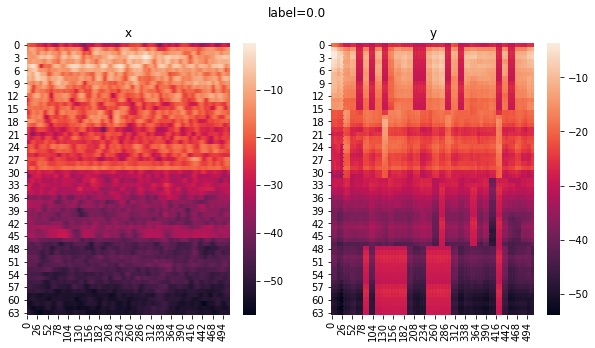

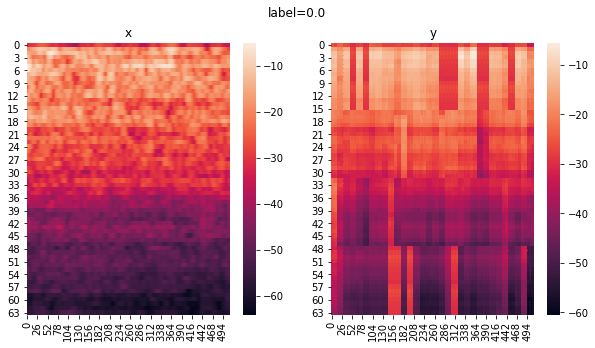

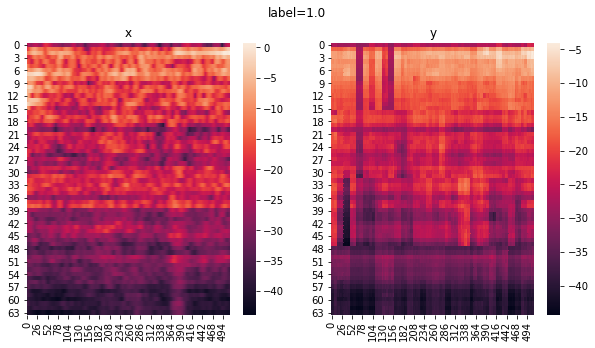

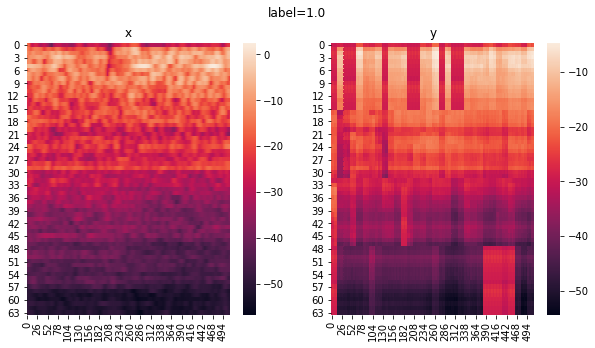

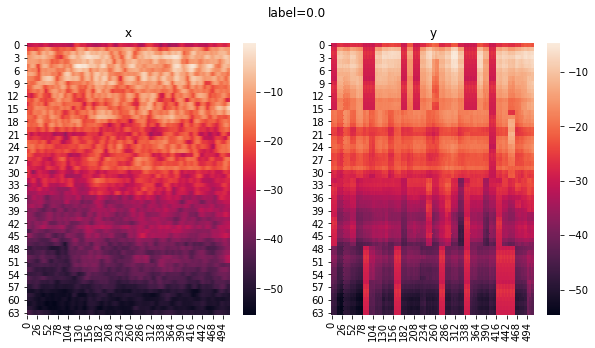

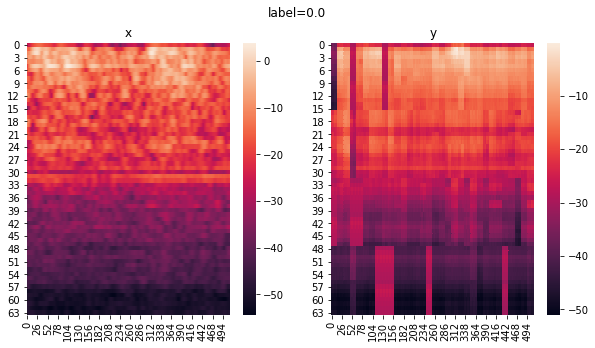

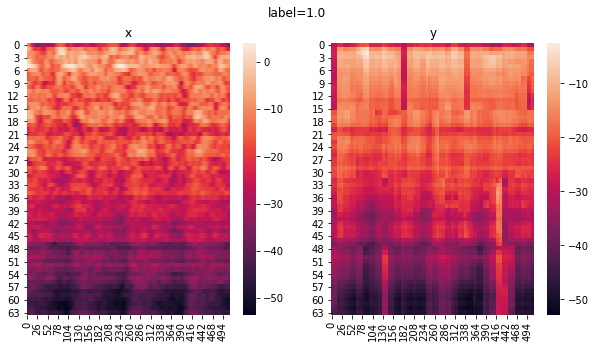

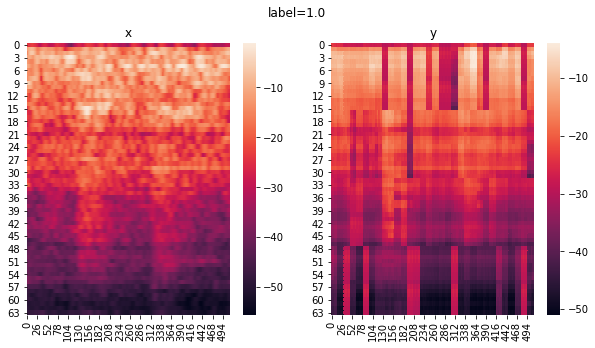

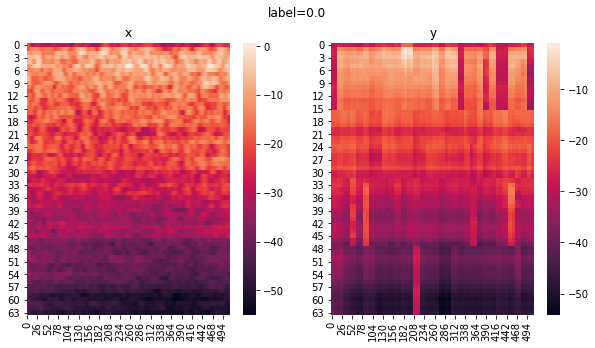

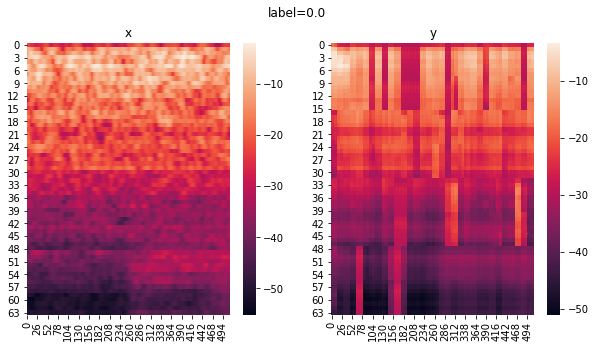

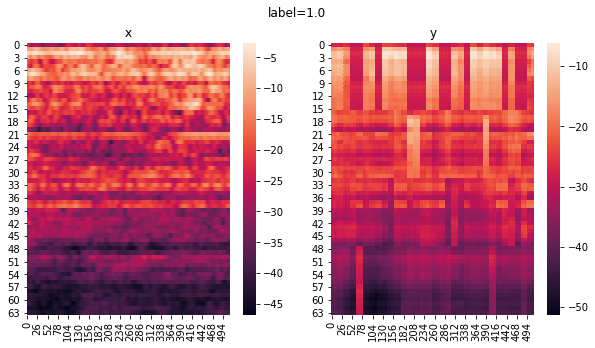

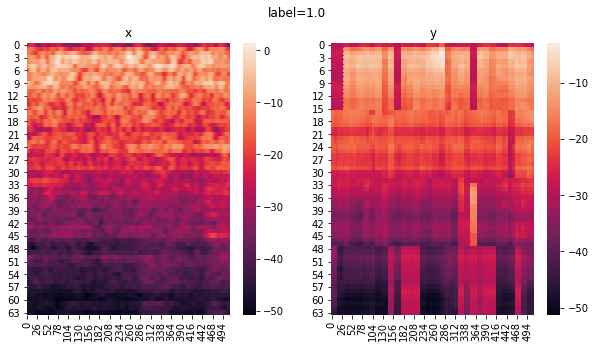

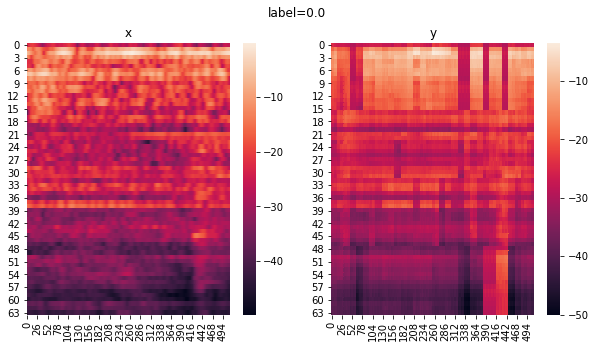

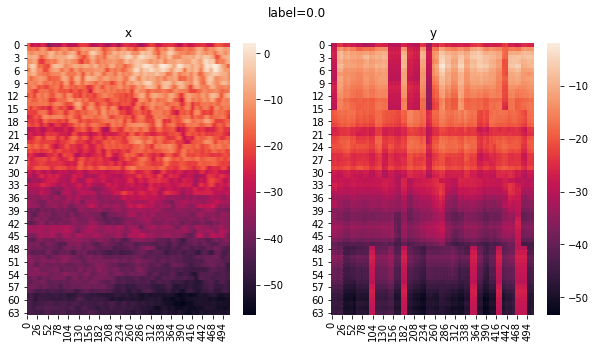

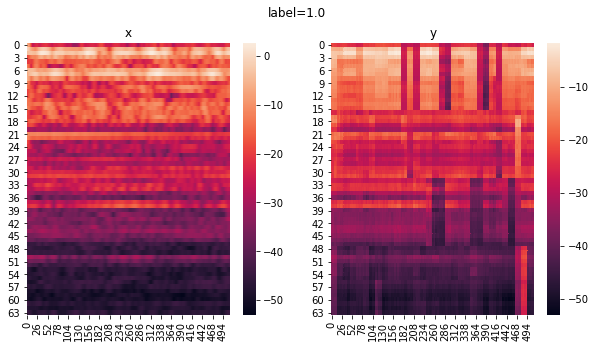

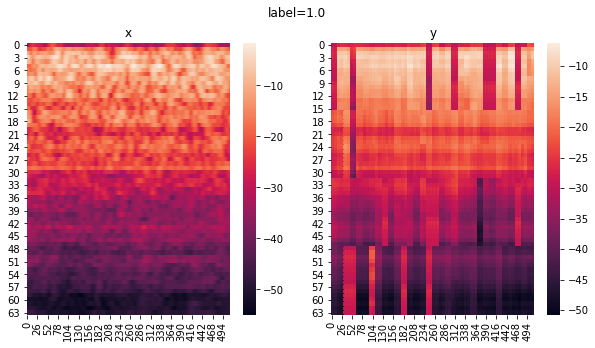

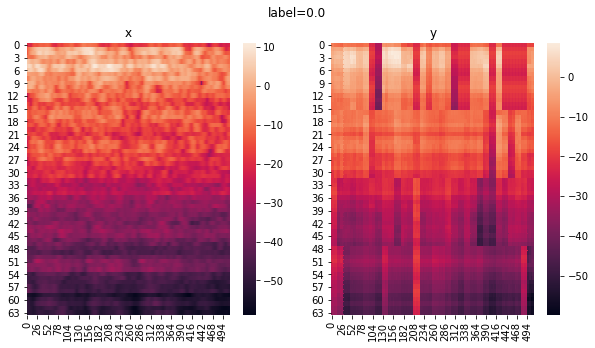

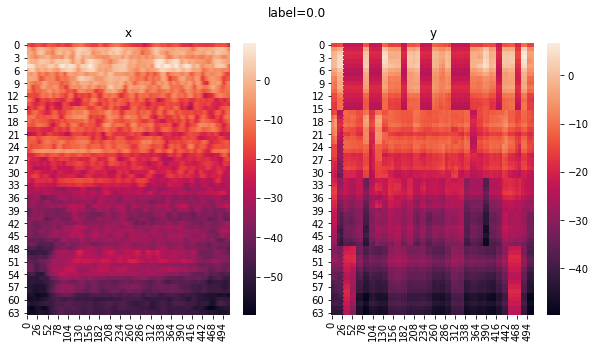

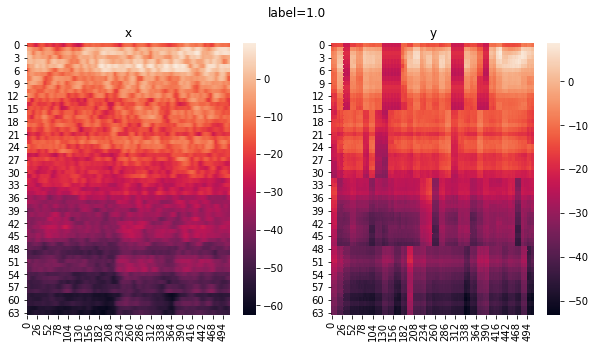

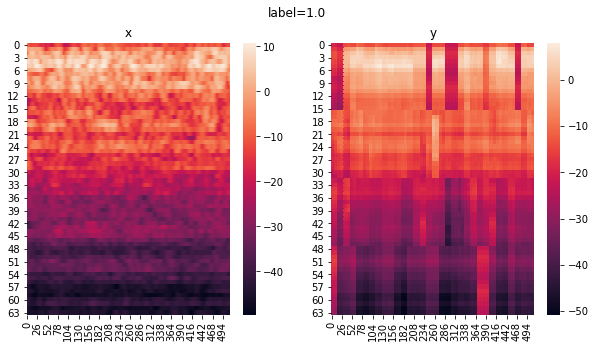

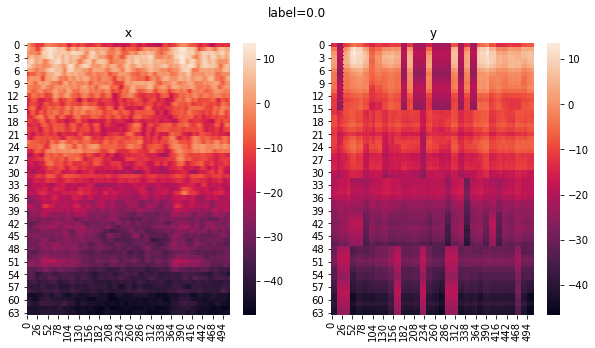

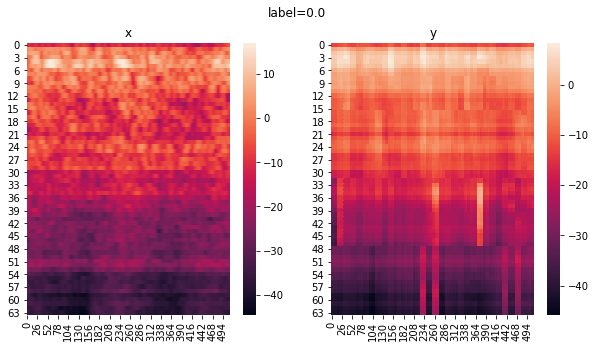

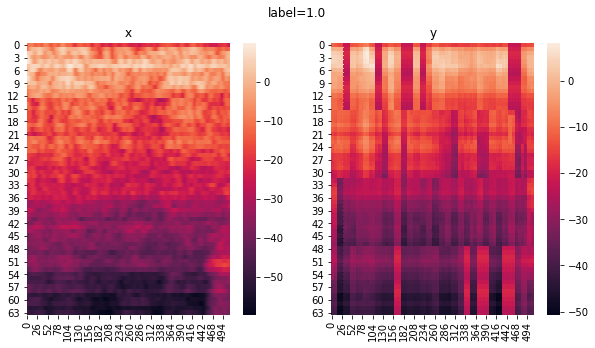

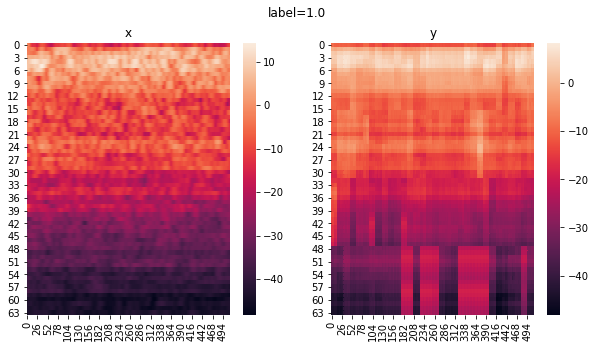

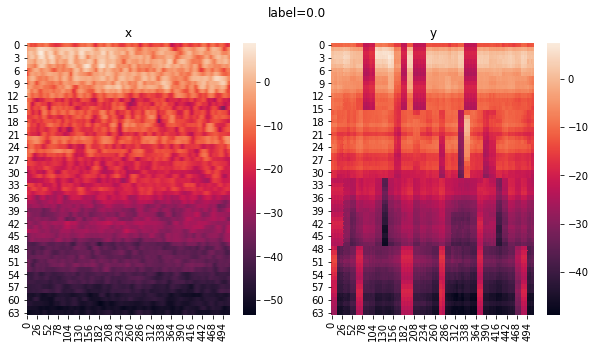

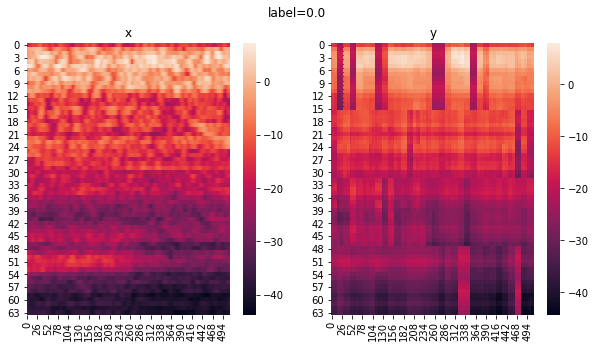

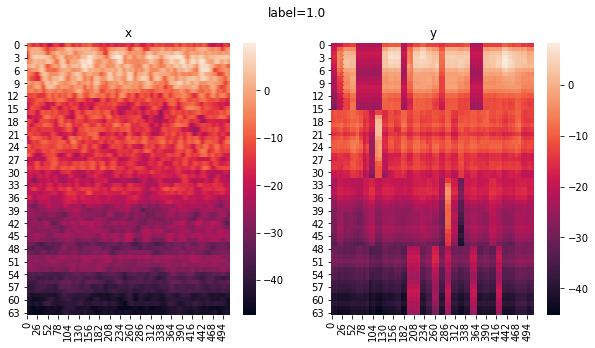

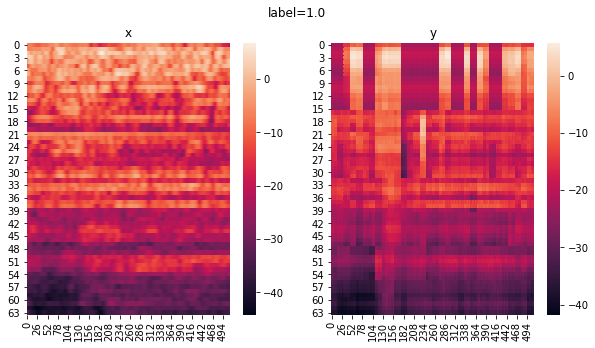

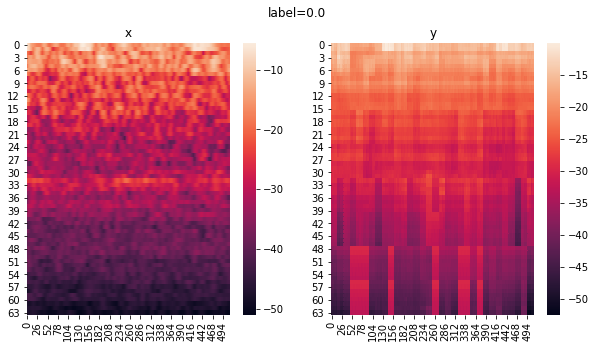

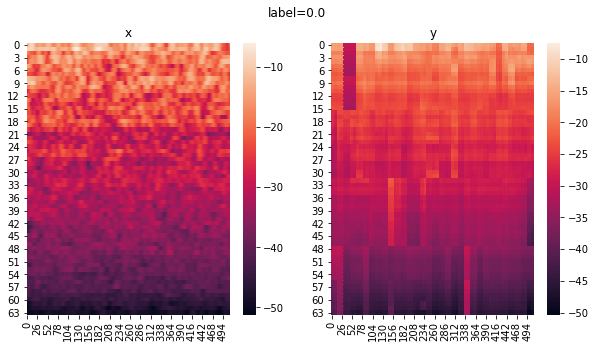

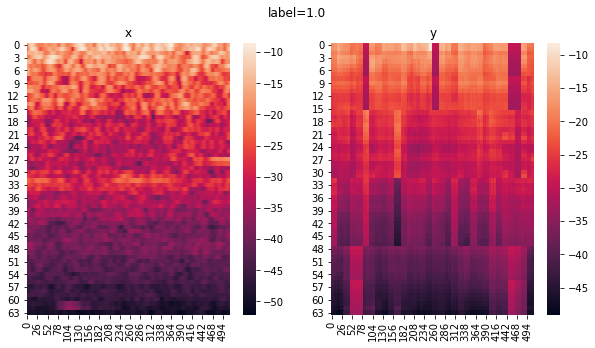

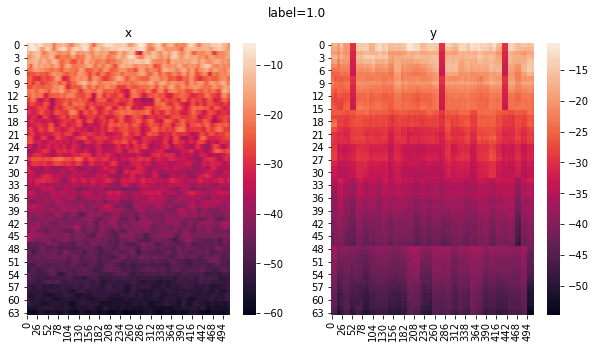

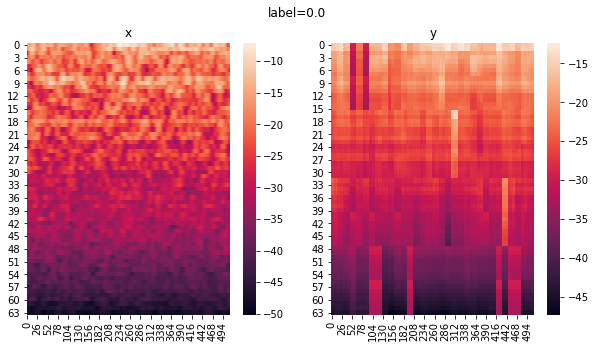

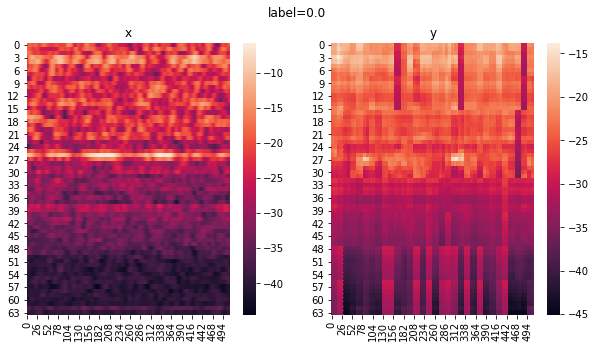

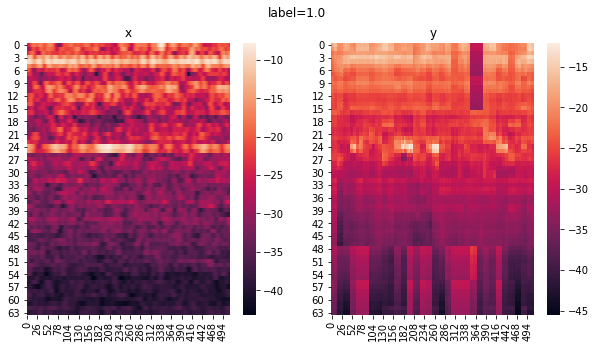

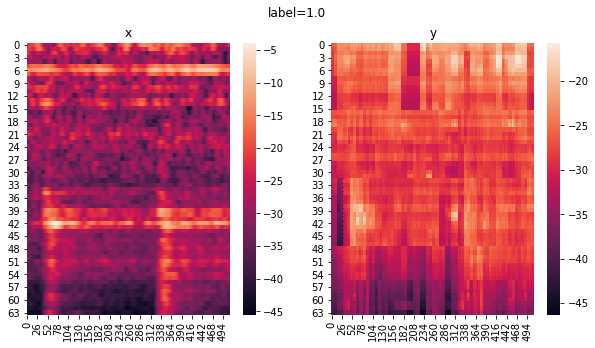

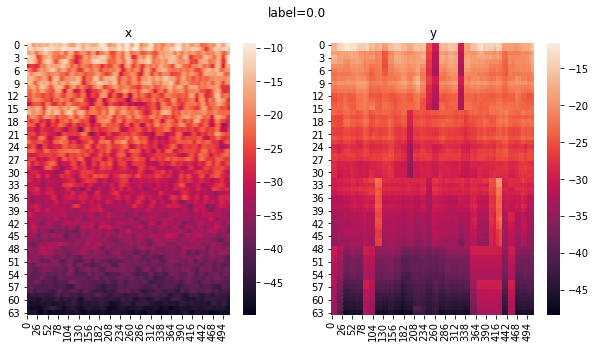

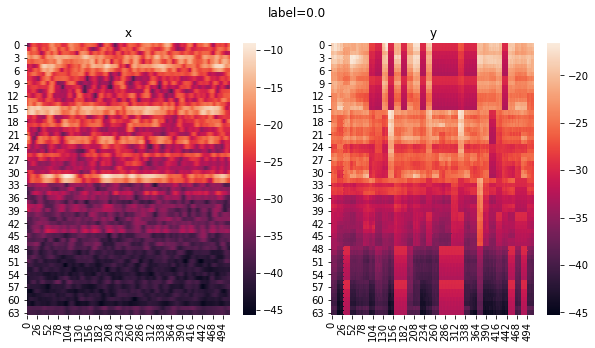

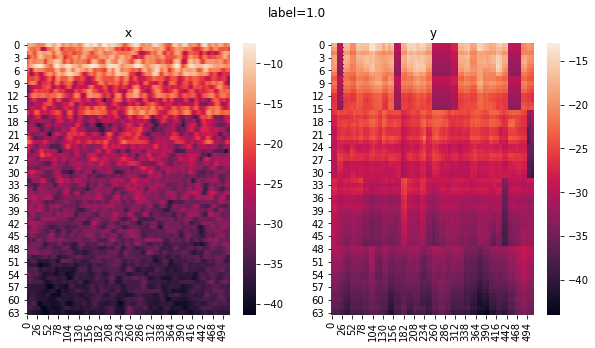

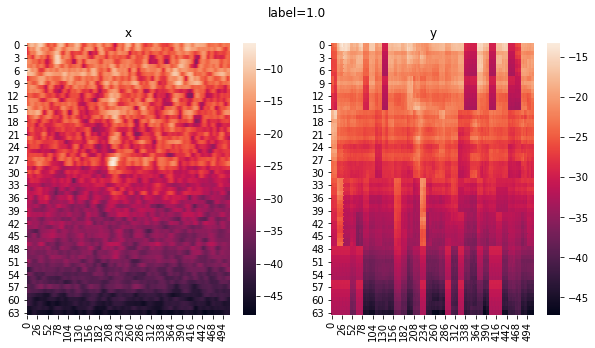

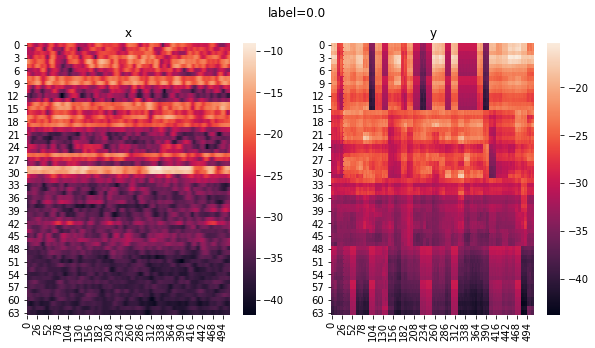

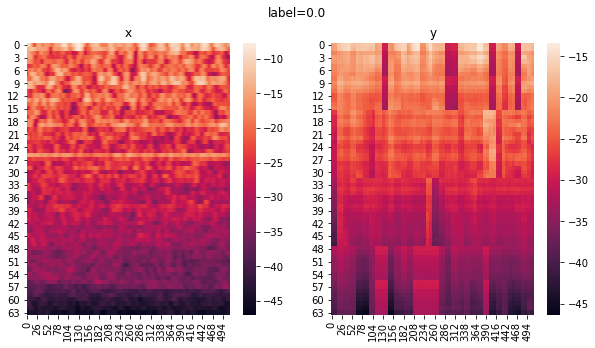

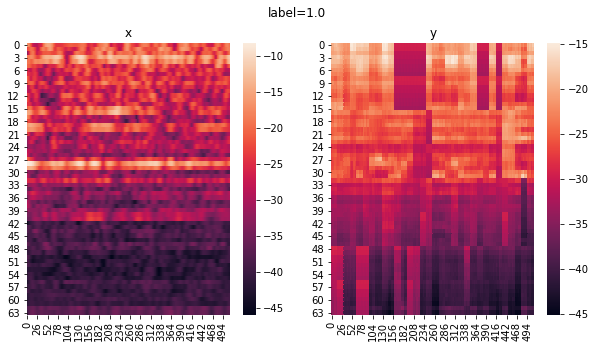

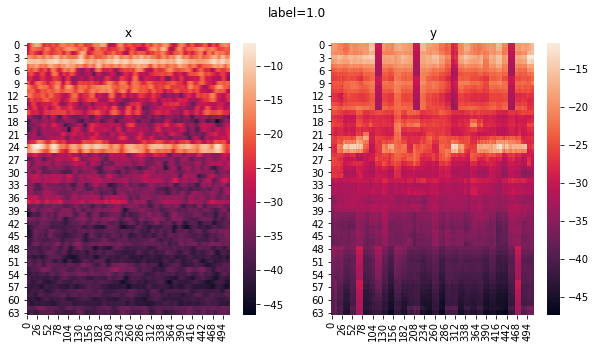

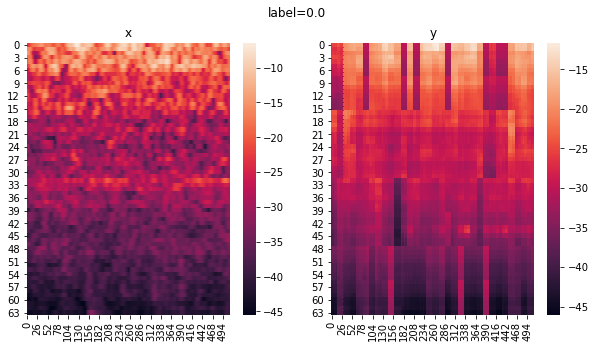

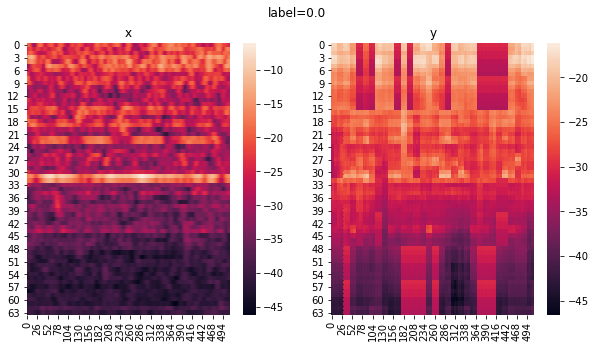

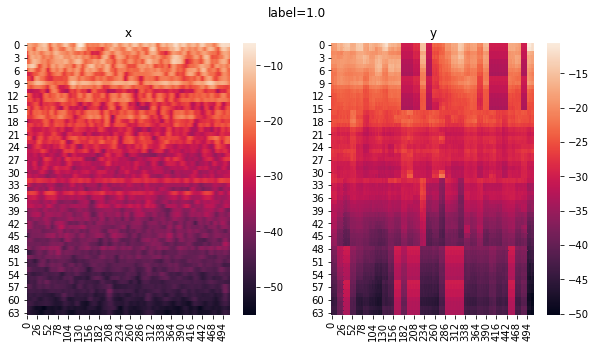

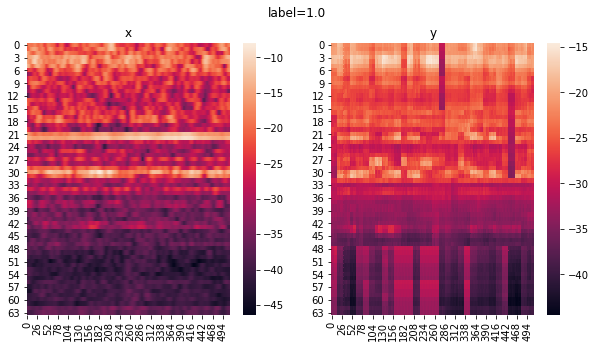

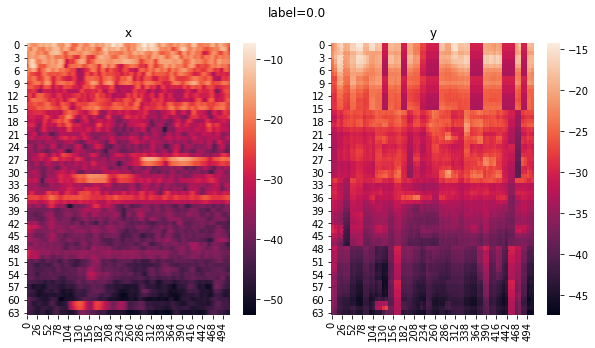

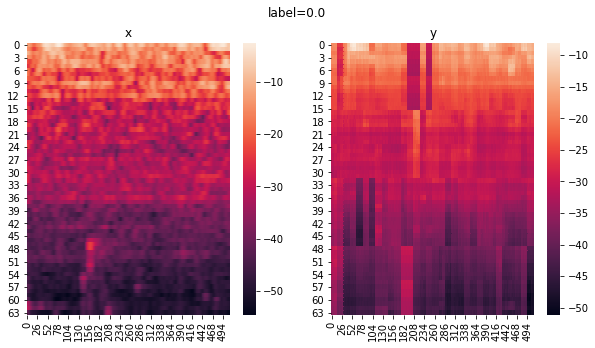

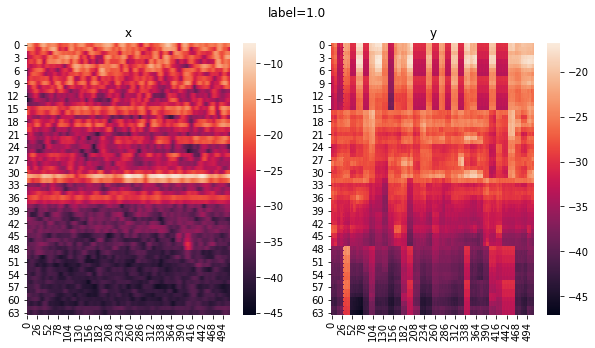

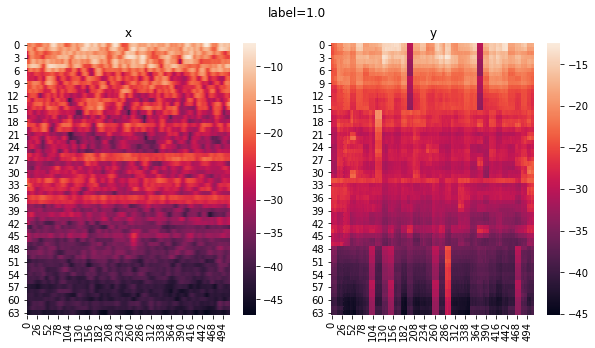

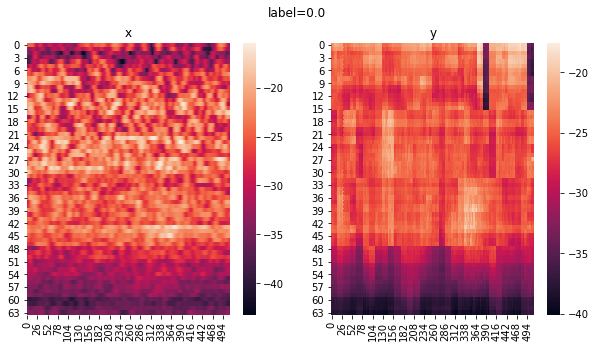

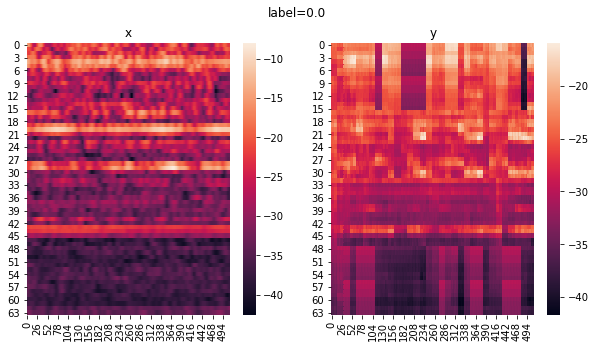

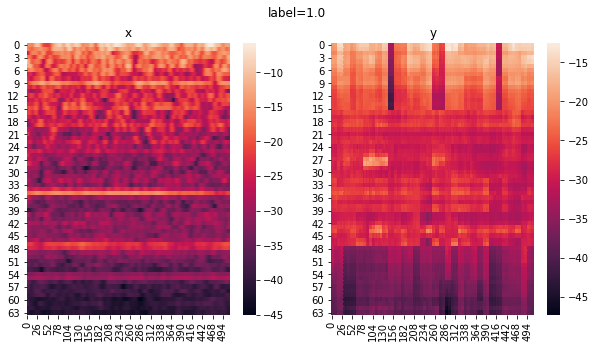

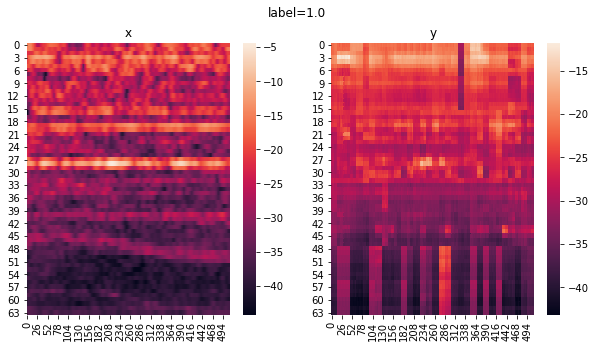

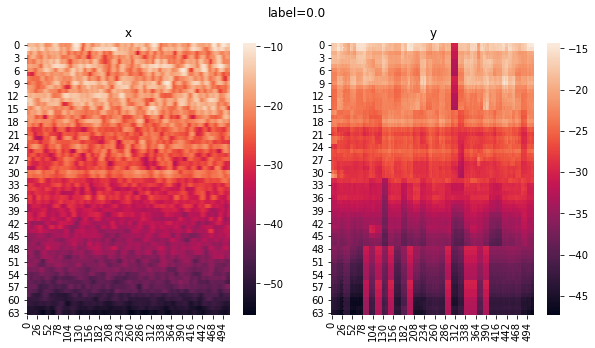

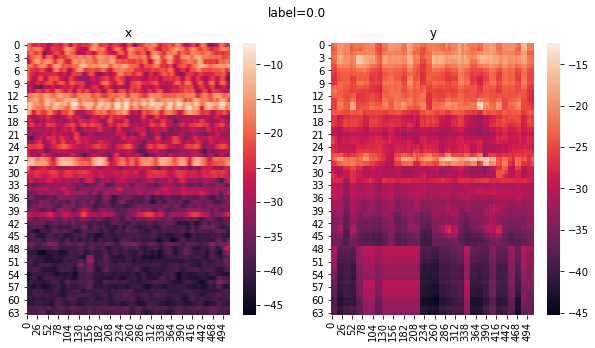

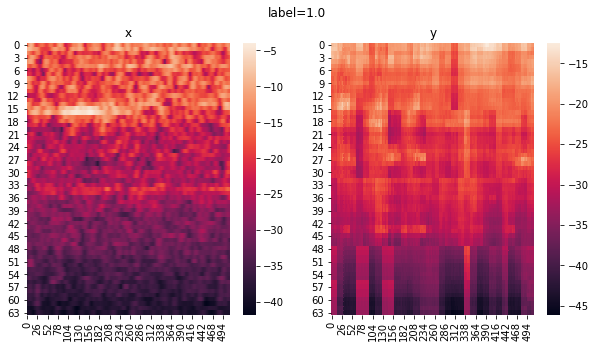

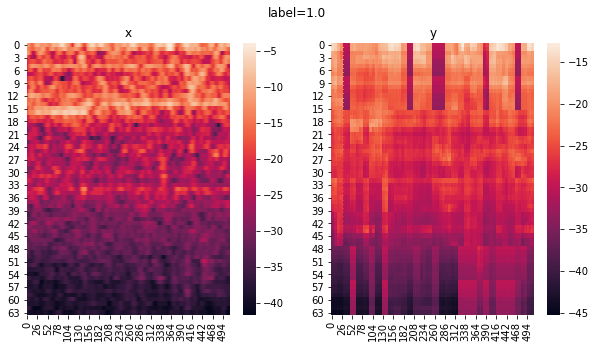

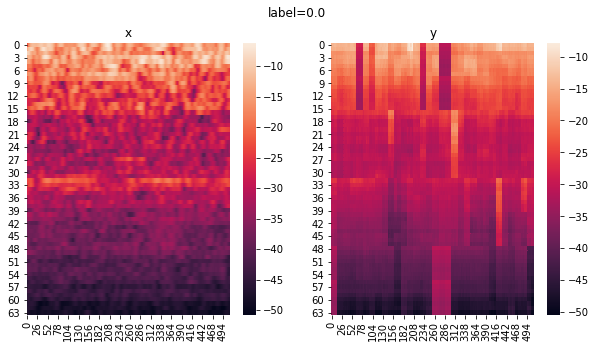

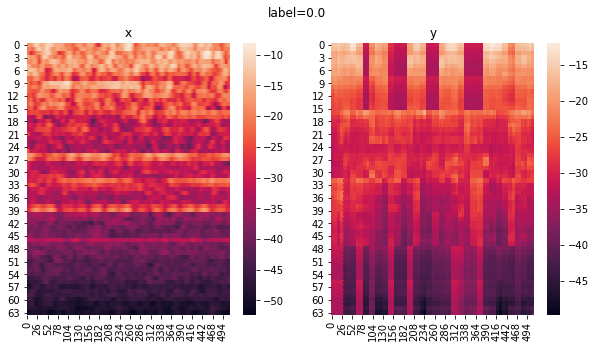

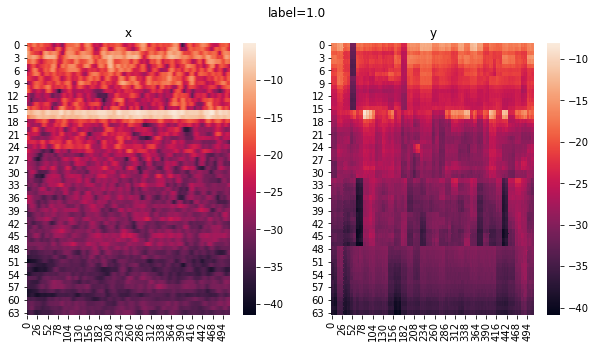

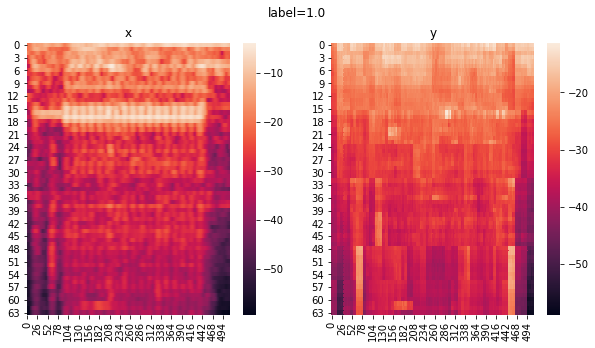

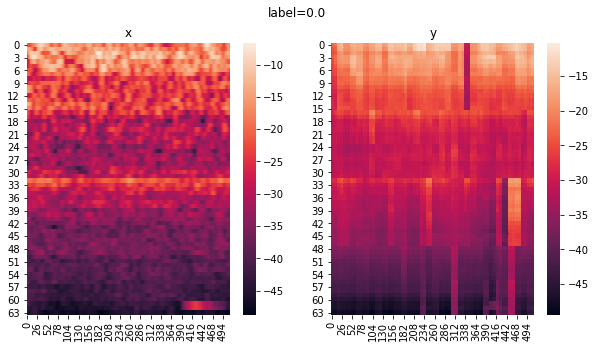

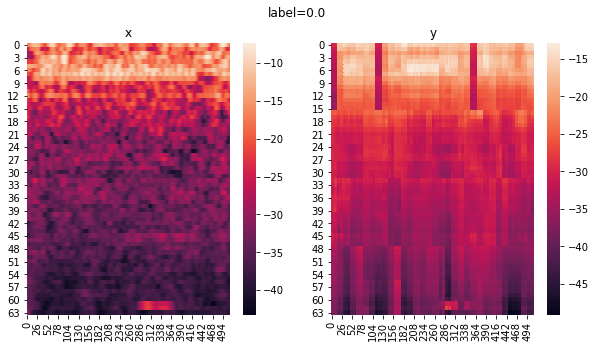

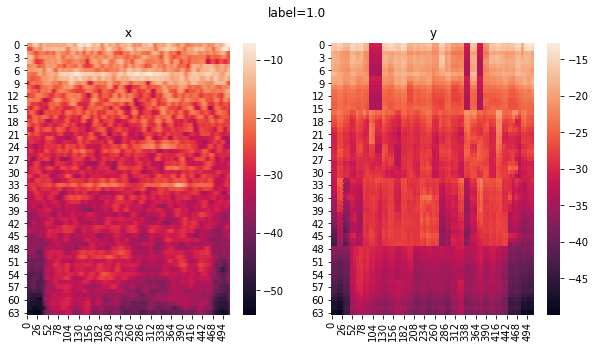

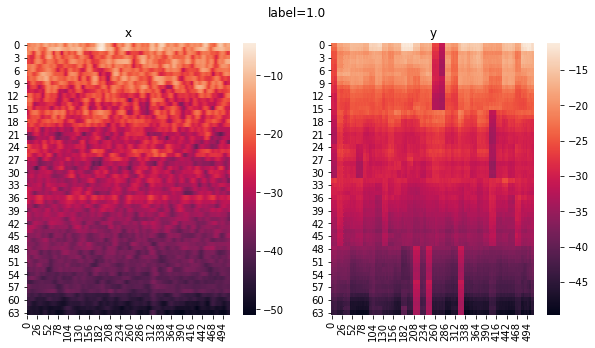

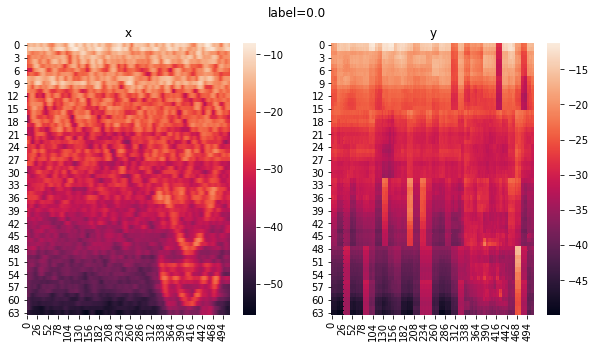

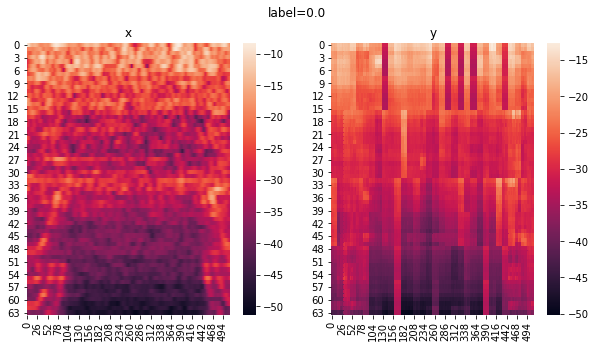

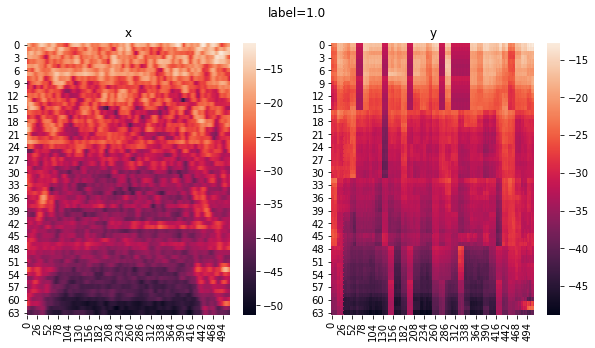

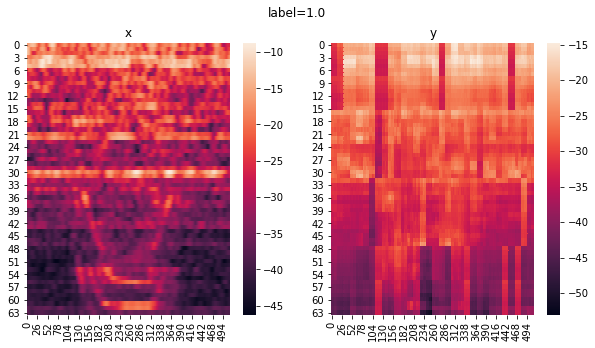

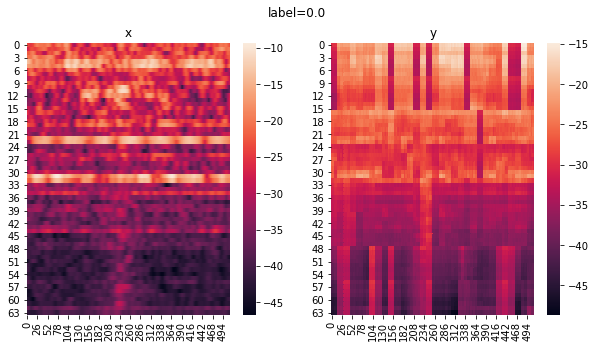

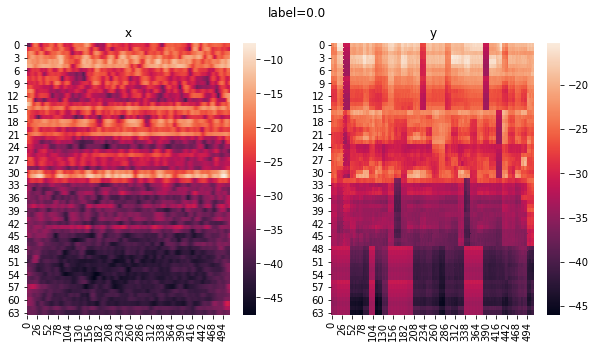

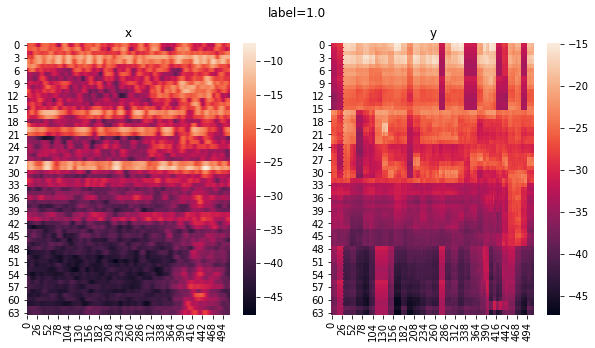

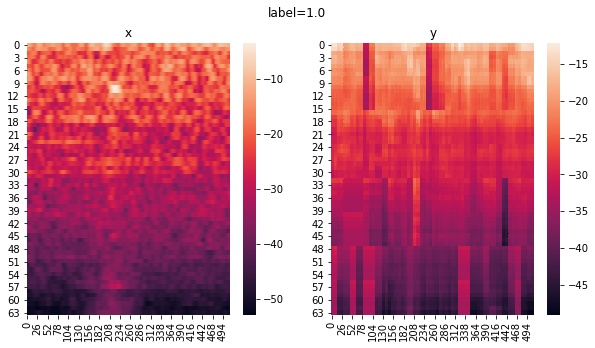

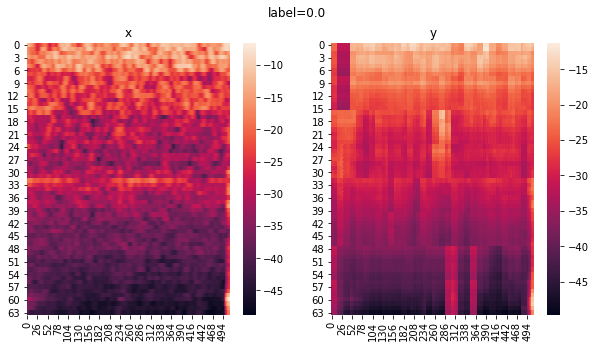

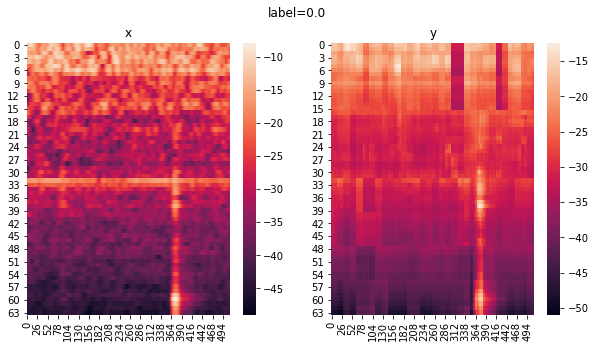

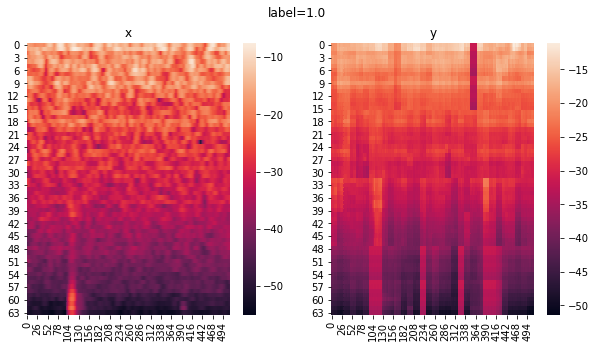

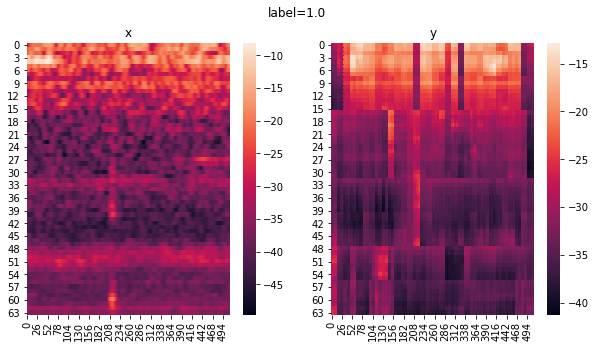

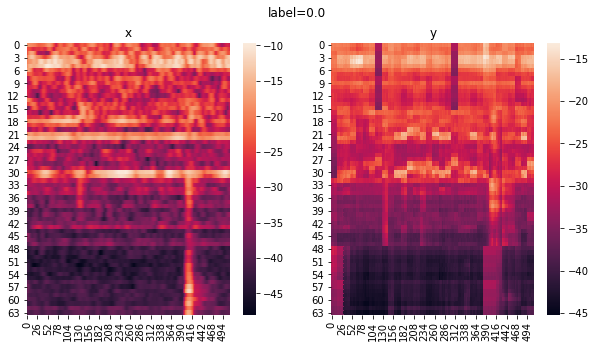

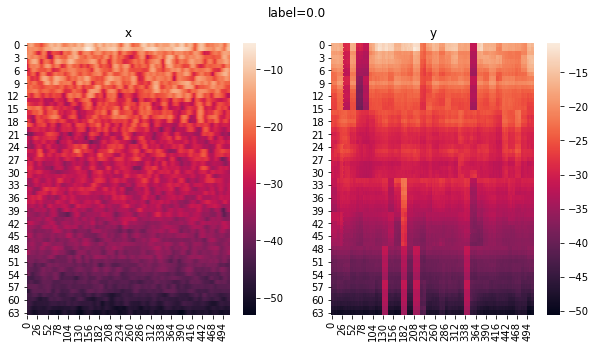

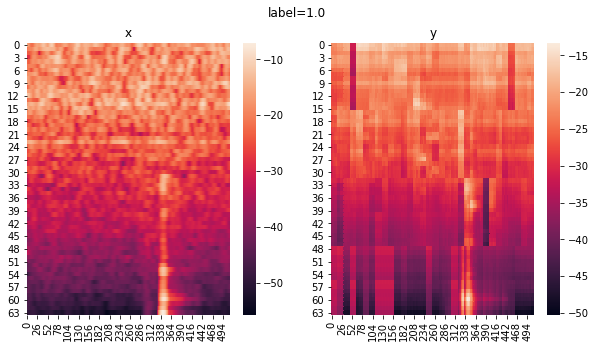

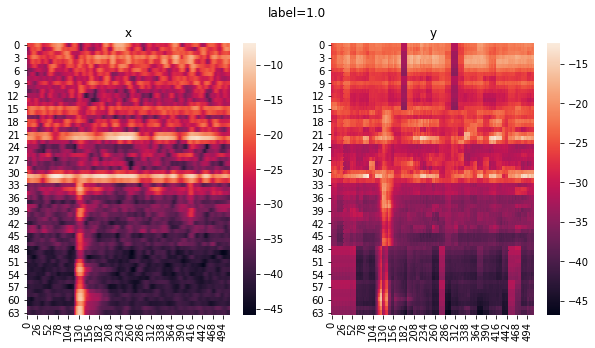

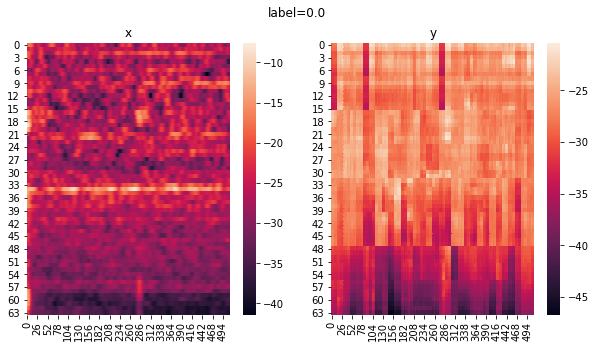

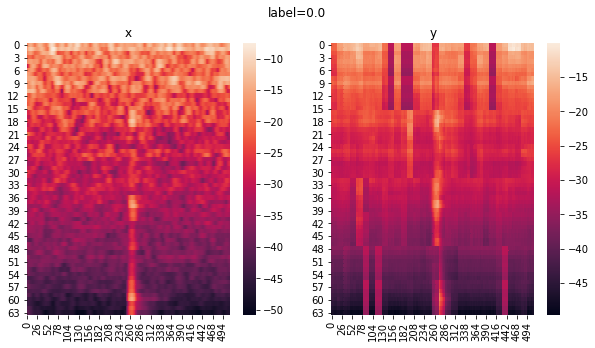

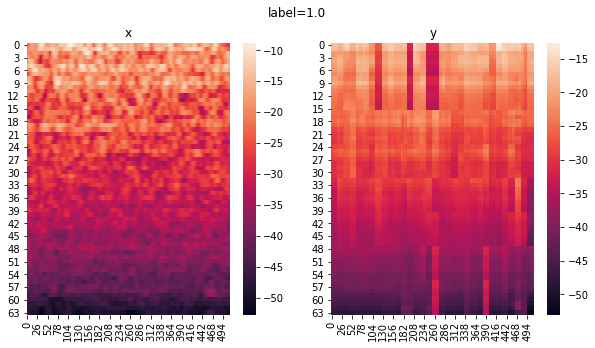

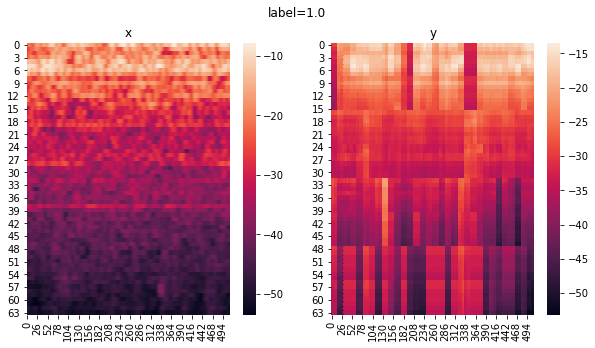

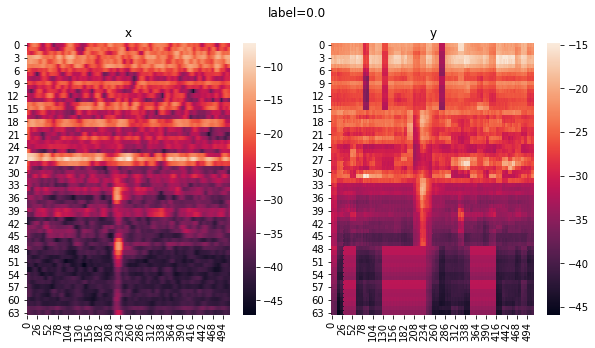

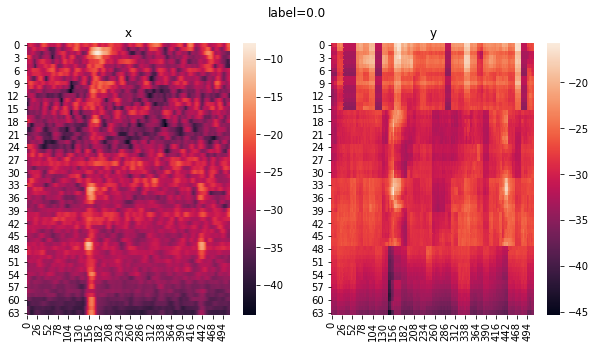

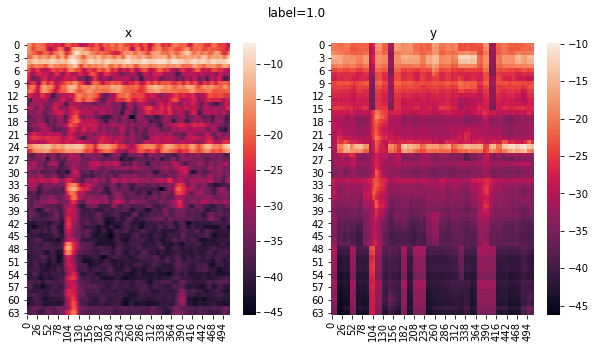

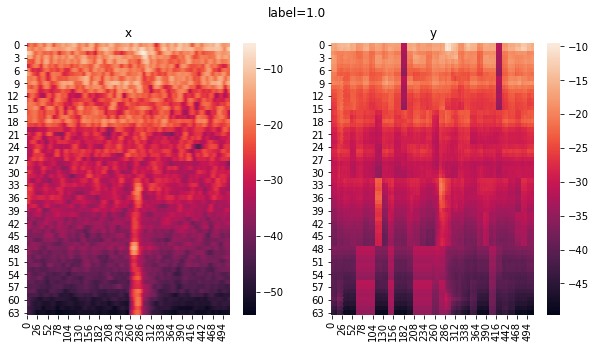

In [8]:
#def run_eval(param, mode):
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# make output result directory
os.makedirs(RESULT_DIR, exist_ok=True)

# load base directory
dirs = com.select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []


# loop of the base directory
for idx, target_dir in enumerate(dirs):
    com.logger.info("===========================")
    com.logger.info("[{idx}/{total}] {dirname}".format(
        dirname=target_dir, idx=idx+1, total=len(dirs)))

    machine_type = os.path.split(target_dir)[1]

    com.logger.info("============== MODEL LOAD ==============")

    model_file = "{model}/{machine_type}_model.pth".format(
        model=param["model_directory"],
        machine_type=machine_type)

    if not os.path.exists(model_file):
        com.logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)

    # define AE model
    model = Model(sample_rate=config['preprocessing']['sample_rate'],
                  window_size=config['preprocessing']['window_size'],
                  hop_size=config['preprocessing']['hop_size'],
                  mel_bins=config['preprocessing']['mel_bins'],
                  fmin=config['preprocessing']['fmin'],
                  fmax=config['preprocessing']['fmax']).to(device)
    model.eval()
    model.load_state_dict(torch.load(model_file))

    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = eval_func.get_machine_id_list_for_test(target_dir)
    recons_outpath = RECONS_OUTDIR + '/' + machine_type
    os.makedirs(recons_outpath, exist_ok=True)
    for id_str in machine_id_list:

        # load list of test files
        test_files, y_true = eval_func.test_file_list_generator(target_dir, id_str, mode)

        # setup anomaly score file path
        anomaly_score_csv = \
            "{result}/anomaly_score_{machine_type}_{id_str}.csv"\
            .format(result=param["result_directory"],
                    machine_type=machine_type,
                    id_str=id_str)
        anomaly_score_list = []

        com.logger.info(
            "============== BEGIN TEST FOR A MACHINE ID ==============")

        y_pred = [0. for k in test_files]
        anomaly_count = 0
        normal_count = 0
        for file_idx, file_path in enumerate(test_files):
            try:
                data = com.file_load(file_path)
                data = data[0]
                # reconstruction through auto encoder in pytorch
                input_data = torch.from_numpy(data).float().to(device)
                input_data = input_data.unsqueeze(0)
                with torch.no_grad():
                    output_dict = model(input_data)
                    pred = output_dict['loss'].to('cpu').detach().numpy().copy()
                    # make reconstruct_img
                    x = output_dict['x'].to('cpu')[0,:,:,0]
                    y = output_dict['y'].to('cpu')[0,:,:,0]
                    label = y_true[file_idx]
                    file_name = os.path.basename(file_path).replace('.wav', '')
                    file_name = recons_outpath + '/' + file_name
                    if int(label) == 1:
                        if anomaly_count == 2:
                            continue
                        make_reconstruct_img(x, y, label, file_name)
                        anomaly_count+=1
                    else:
                        if normal_count == 2:
                            continue
                        make_reconstruct_img(x, y, label, file_name)
                        normal_count+=1
                    
                y_pred[file_idx] = pred
                anomaly_score_list.append(
                    [os.path.basename(file_path), y_pred[file_idx]])
            except FileNotFoundError:
                com.logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        eval_func.save_csv(save_file_path=anomaly_score_csv,
                           save_data=anomaly_score_list)
        com.logger.info(
            "anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(
                y_true, y_pred, max_fpr=config["etc"]["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            com.logger.info("AUC : {}".format(auc))
            com.logger.info("pAUC : {}".format(p_auc))

        com.logger.info(
            "============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = numpy.mean(
            numpy.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(
        result=param["result_directory"],
        file_name=param["result_file"])
    com.logger.info("AUC and pAUC results -> {}".format(result_path))
    eval_func.save_csv(save_file_path=result_path, save_data=csv_lines)

In [12]:
anomaly_count

0